In [ ]:
"""
UOSQMT
Graphene finding system using machine learning.
"""

'\nUOSQMT\nGraphene finding system using machine learning.\n'

In [ ]:
# mount the google drive
from google.colab import drive 
drive.mount('/content/drive/')

KeyboardInterrupt: ignored

In [ ]:
dir(cv2)

In [ ]:
# import

import numpy as np
import cv2
import pandas as pd
from skimage.filters import roberts, sobel, scharr, prewitt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy import ndimage as nd
import time
import glob
import pickle
from matplotlib import pyplot as plt
from scipy.stats import mode
from scipy import ndimage
from sklearn.model_selection import RandomizedSearchCV, cross_val_predict, cross_val_score
import shutil
from sklearn.metrics import confusion_matrix

In [ ]:
# feature extraction function

def feature_extractor(img):
    df = pd.DataFrame()
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    h=h.reshape(-1)
    s=s.reshape(-1)
    v=v.reshape(-1)
    df['h']=h
    df['s']=s
    df['v']=v
    
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img2 = img.reshape(-1)
    df['grayscale'] = img2
    
    scharr_fit = scharr(img)
    scharr_fit= scharr_fit.reshape(-1)
    df['scharr'] = scharr_fit

    prewitt_fit = prewitt(img)
    prewitt_fit = prewitt_fit.reshape(-1)
    df['prewitt'] = prewitt_fit
    
    gaussian3 = nd.gaussian_filter(img, sigma=3)
    gaussian3 = gaussian3.reshape(-1)
    df['G3'] = gaussian3

    gaussian7= nd.gaussian_filter(img, sigma=7)
    gaussian7 = gaussian7.reshape(-1)
    df['G7'] = gaussian7

    return df

In [ ]:
# make an image as data frame

def make_dfimg(img,label):
    df = pd.DataFrame()
    df = feature_extractor(img)
    label = cv2.cvtColor(label, cv2.COLOR_BGR2GRAY)
    label[label>0]=1
    label = label.reshape(-1)
    df['Labels'] = label
    return df

In [ ]:
# concatenate data frames

def img_lab(img_path):
    df = pd.DataFrame()
    for file in glob.glob(img_path):
        print(file)
        print(file.split('/')[2].split('.')[0])
        img= cv2.imread(file)
        img = cv2.resize(img, (int(img.shape[0]/4),int(img.shape[1]/4)))
        labeled_img = cv2.imread('/content/drive/MyDrive/Woonhyung_GJ/Mask/'+file.split('/')[6].split('.')[0]+'_Mono.ome.tiff')
        labeled_img = cv2.resize(labeled_img, (int(labeled_img.shape[0]/4),int(labeled_img.shape[1]/4)))
        df1 = make_dfimg(img,labeled_img)
        df = pd.concat([df,df1])

    return df


In [ ]:
# Local computer 에서 작동 시 train,test img_path, mask_path 변경 해주셔야합니다.

In [ ]:
!pwd

/Volumes/GoogleDrive/.shortcut-targets-by-id/1-9B-dXir5KHuMODUOEkdMbl-1rTOQ0na/Woonhyung_GJ


In [ ]:
# Pretrain 된 모델 사용 시 실행 하지 않으셔도 좋습니다.
img_path = "/Users/chowoonhyung/Google Drive/My Drive/Woonhyung_GJ/train/*.jpg"
df_train=img_lab(img_path)

img_path = "/content/drive/MyDrive/Woonhyung_GJ/test/*.jpg"
df_test=img_lab(img_path)


In [ ]:
!pwd

/Volumes/GoogleDrive/.shortcut-targets-by-id/1-9B-dXir5KHuMODUOEkdMbl-1rTOQ0na/Woonhyung_GJ


In [ ]:
# Pretrain 된 모델 사용 시 실행 하지 않으셔도 좋습니다.
X_train = df_train.drop(labels = ["Labels"], axis=1) 
Y_train = df_train["Labels"].values


### XGBoost

In [ ]:
# Pretrain 된 모델 사용 시 실행 하지 않으셔도 좋습니다.
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train,Y_train)


XGBClassifier()

In [ ]:
# Pretrain 된 모델 사용 시 실행 하지 않으셔도 좋습니다.

# save the model
filename = 'pretrained_XGB_model_for_colab'
pickle.dump(xgb_clf,open(filename,'wb'))

In [ ]:
!pwd

/Volumes/GoogleDrive/.shortcut-targets-by-id/1-9B-dXir5KHuMODUOEkdMbl-1rTOQ0na/Woonhyung_GJ


/content/drive/MyDrive/Woonhyung_GJ/test/WHGr1_June21_00900.png
1번째 이미지 분석
/content/drive/MyDrive/Woonhyung_GJ/test/WHGr1_June21_01001.png
2번째 이미지 분석
/content/drive/MyDrive/Woonhyung_GJ/test/WHGr1_June21_00904.png
3번째 이미지 분석
/content/drive/MyDrive/Woonhyung_GJ/test/WHGr1_June21_00903.png
4번째 이미지 분석
/content/drive/MyDrive/Woonhyung_GJ/test/WHGr1_June21_00902.png
5번째 이미지 분석
/content/drive/MyDrive/Woonhyung_GJ/test/WHGr1_June21_00901.png
6번째 이미지 분석
/content/drive/MyDrive/Woonhyung_GJ/test/WHGr1_June21_00909.png
7번째 이미지 분석
/content/drive/MyDrive/Woonhyung_GJ/test/WHGr1_June21_00908.png
8번째 이미지 분석
/content/drive/MyDrive/Woonhyung_GJ/test/WHGr1_June21_00906.png
9번째 이미지 분석
/content/drive/MyDrive/Woonhyung_GJ/test/WHGr1_June21_00905.png
10번째 이미지 분석
/content/drive/MyDrive/Woonhyung_GJ/test/WHGr1_June21_00913.png
11번째 이미지 분석
/content/drive/MyDrive/Woonhyung_GJ/test/WHGr1_June21_00912.png
12번째 이미지 분석
/content/drive/MyDrive/Woonhyung_GJ/test/WHGr1_June21_00911.png
13번째 이미지 분석
/content/drive/MyDriv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


22번째 이미지 분석
/content/drive/MyDrive/Woonhyung_GJ/test/WHGr1_June21_00919.png
23번째 이미지 분석
/content/drive/MyDrive/Woonhyung_GJ/test/WHGr1_June21_00918.png
24번째 이미지 분석
/content/drive/MyDrive/Woonhyung_GJ/test/WHGr1_June21_00926.png
25번째 이미지 분석
/content/drive/MyDrive/Woonhyung_GJ/test/WHGr1_June21_00925.png
26번째 이미지 분석
/content/drive/MyDrive/Woonhyung_GJ/test/WHGr1_June21_00924.png
27번째 이미지 분석
/content/drive/MyDrive/Woonhyung_GJ/test/WHGr1_June21_00923.png
28번째 이미지 분석
/content/drive/MyDrive/Woonhyung_GJ/test/WHGr1_June21_00930.png
29번째 이미지 분석
/content/drive/MyDrive/Woonhyung_GJ/test/WHGr1_June21_00929.png
30번째 이미지 분석
/content/drive/MyDrive/Woonhyung_GJ/test/WHGr1_June21_00928.png
31번째 이미지 분석
/content/drive/MyDrive/Woonhyung_GJ/test/WHGr1_June21_00927.png
32번째 이미지 분석
/content/drive/MyDrive/Woonhyung_GJ/test/WHGr1_June21_00934.png
33번째 이미지 분석
/content/drive/MyDrive/Woonhyung_GJ/test/WHGr1_June21_00933.png
34번째 이미지 분석
/content/drive/MyDrive/Woonhyung_GJ/test/WHGr1_June21_00932.png
35번째 이미지 분석


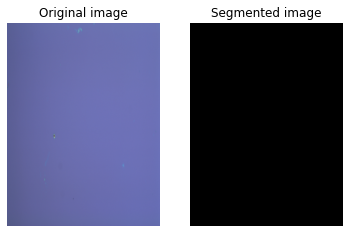

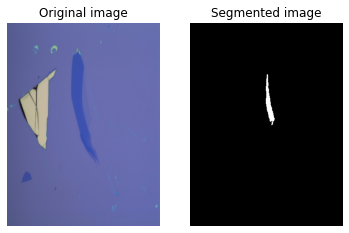

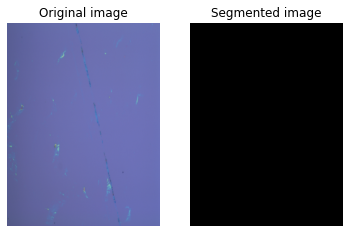

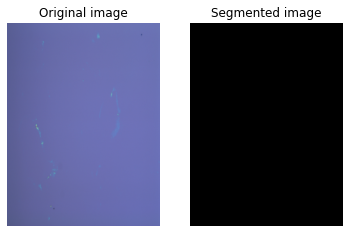

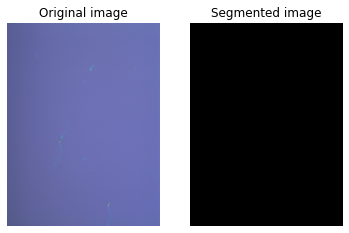

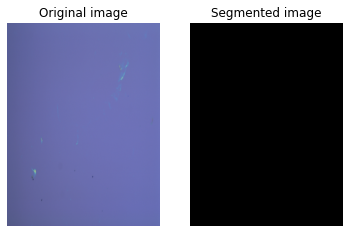

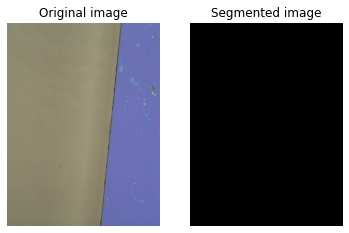

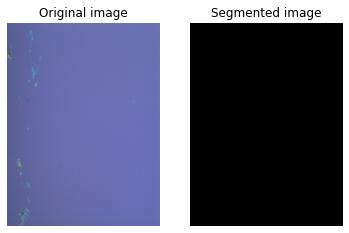

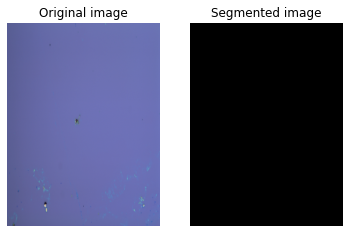

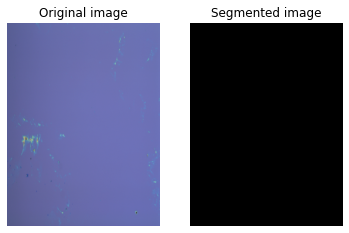

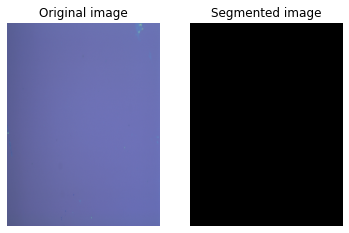

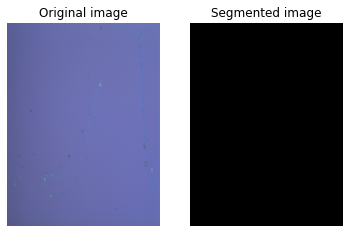

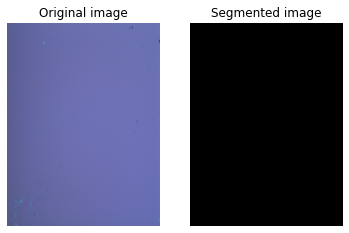

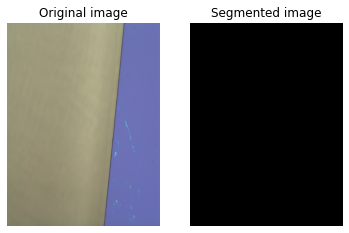

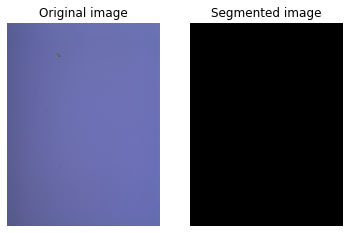

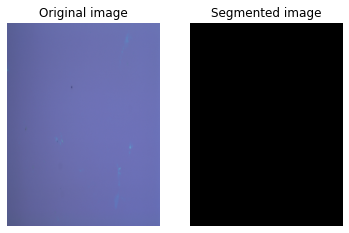

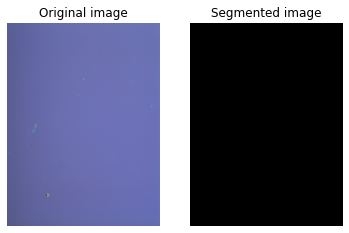

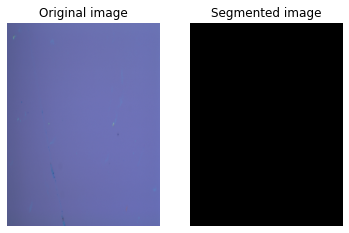

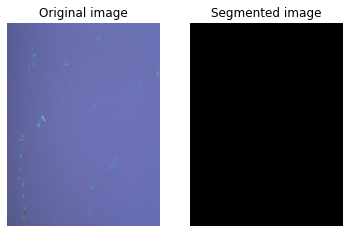

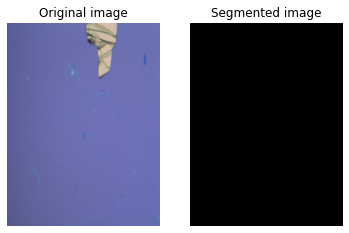

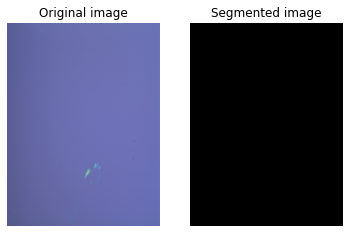

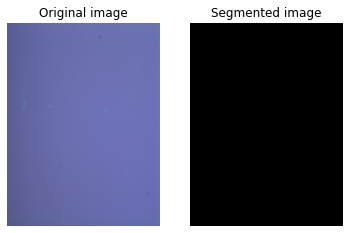

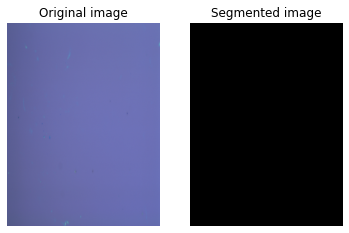

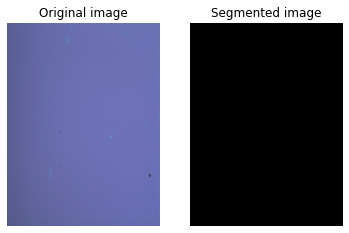

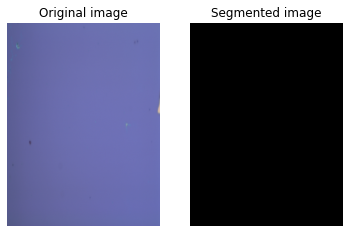

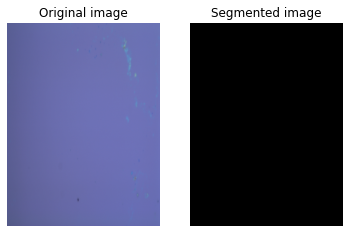

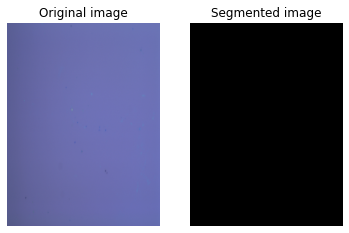

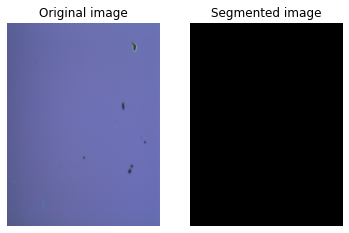

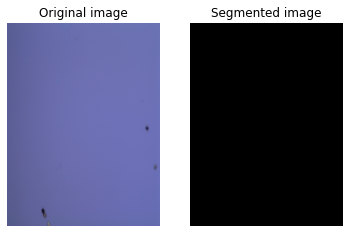

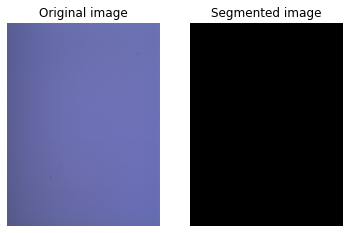

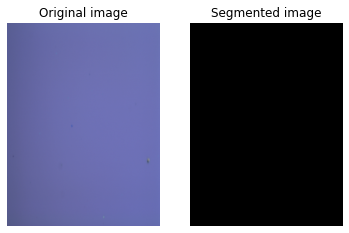

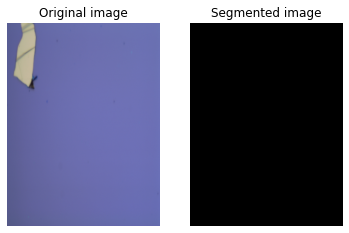

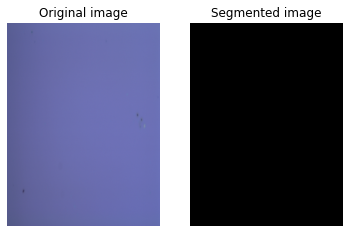

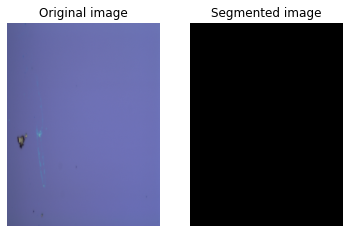

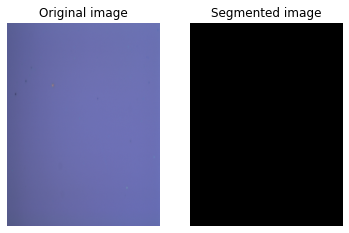

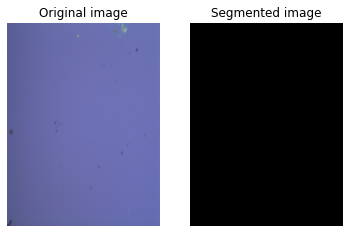

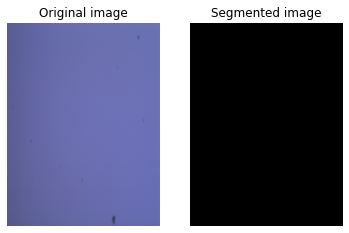

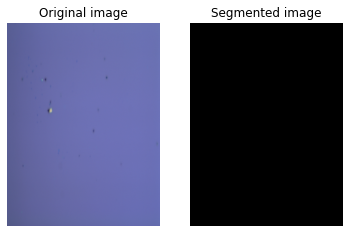

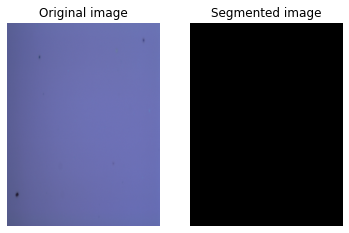

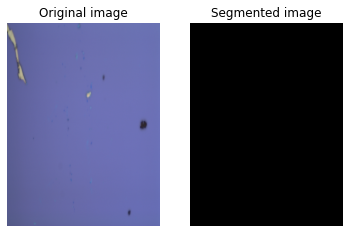

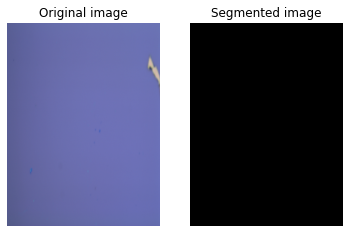

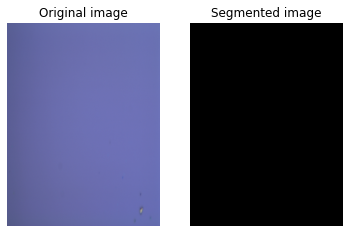

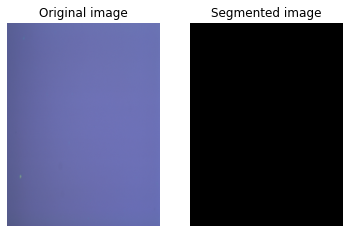

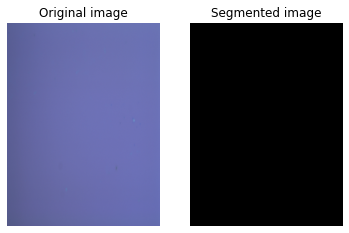

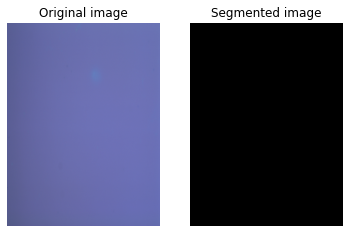

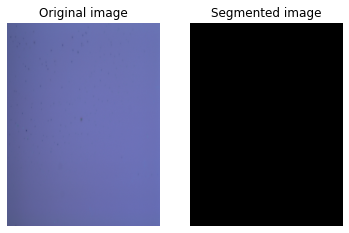

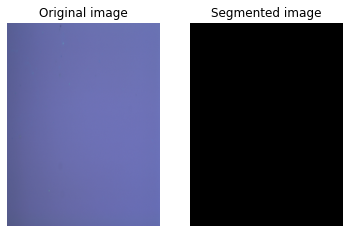

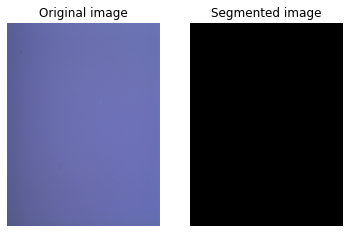

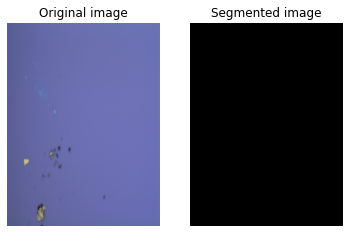

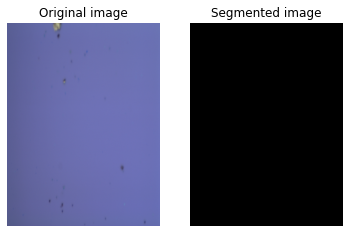

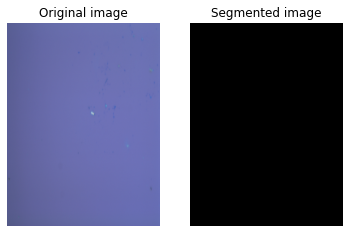

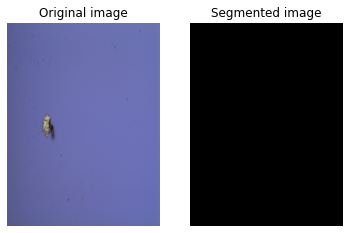

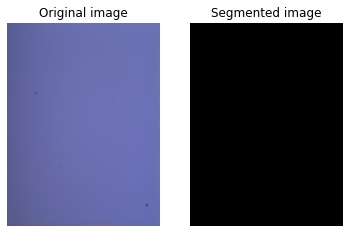

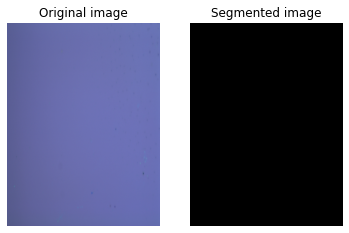

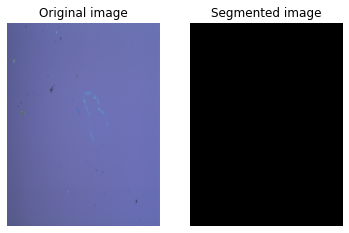

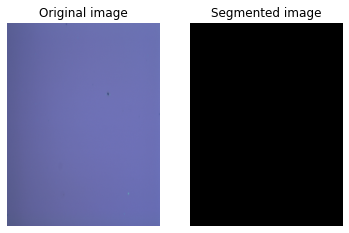

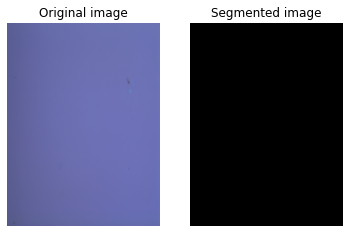

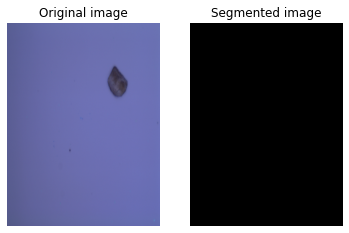

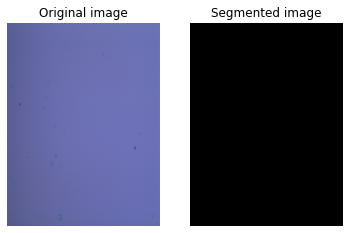

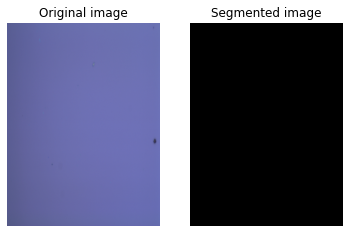

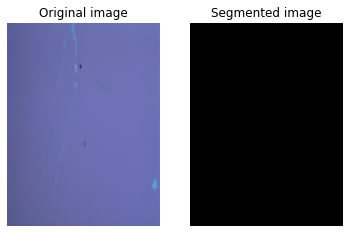

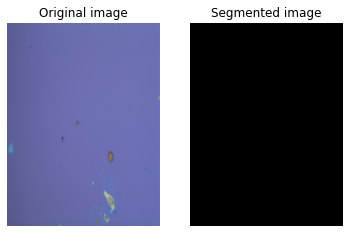

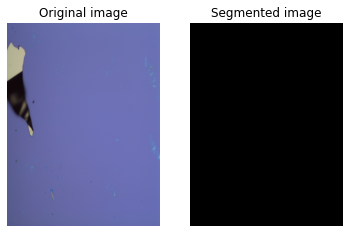

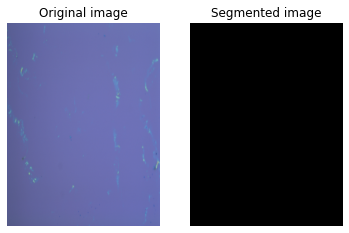

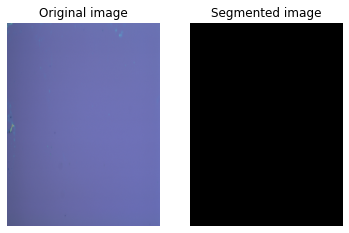

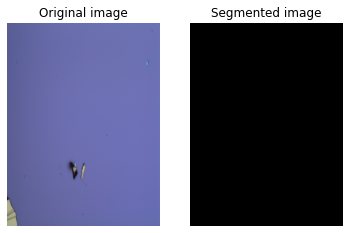

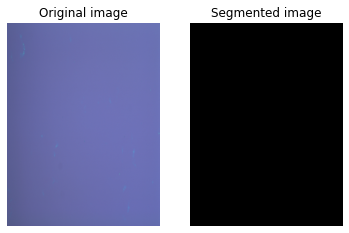

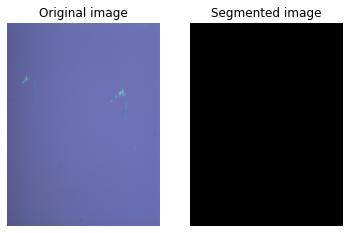

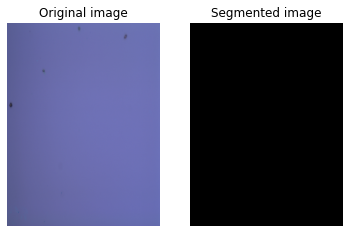

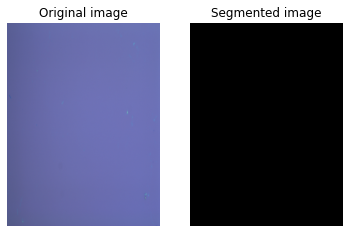

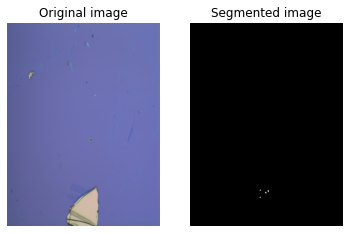

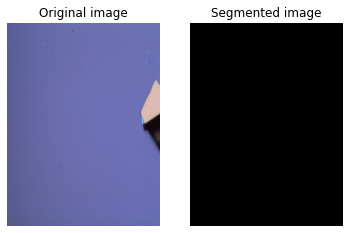

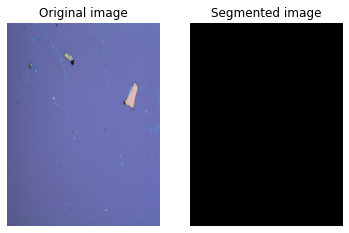

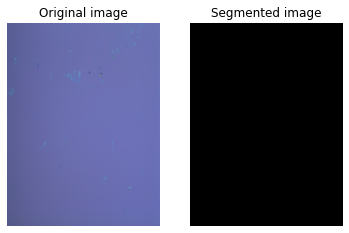

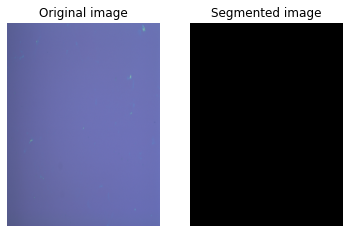

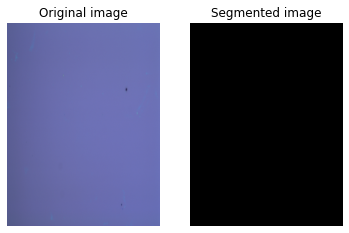

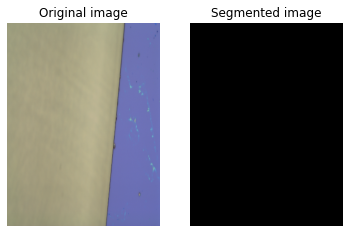

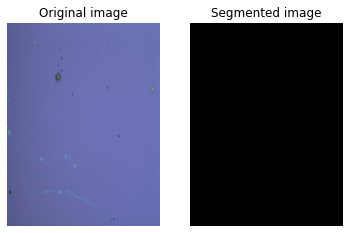

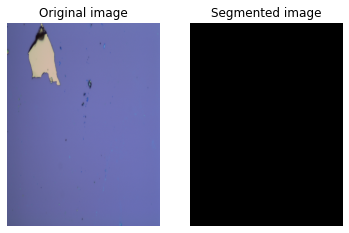

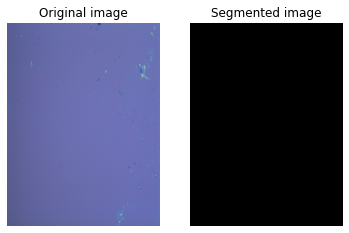

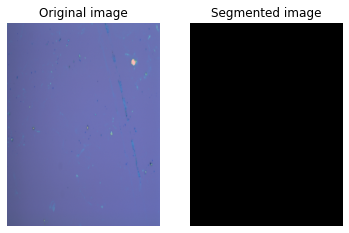

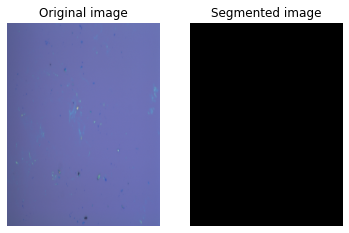

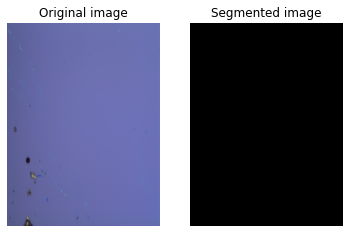

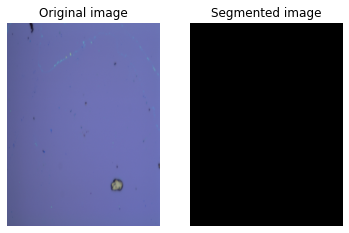

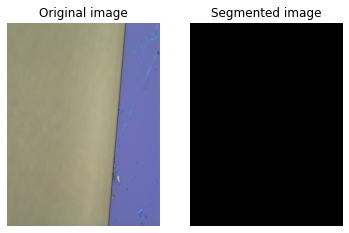

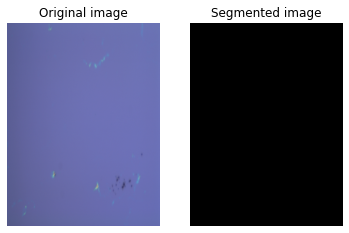

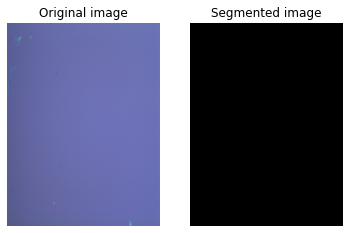

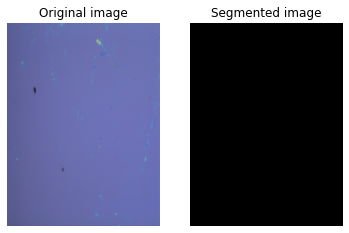

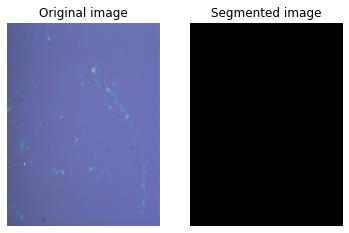

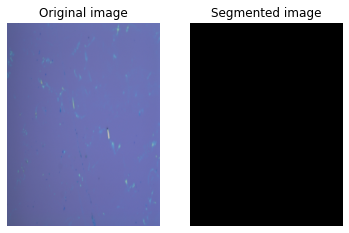

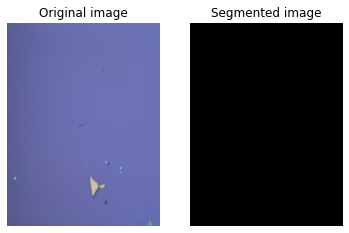

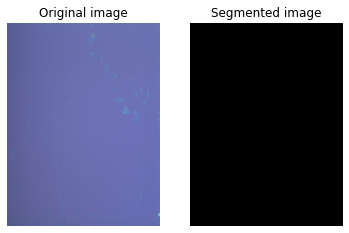

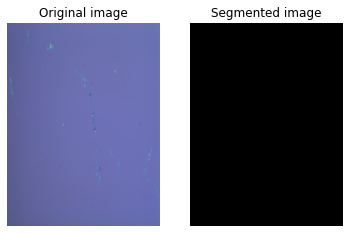

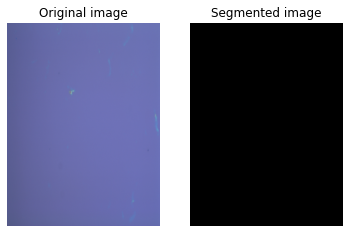

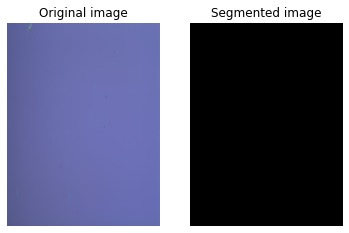

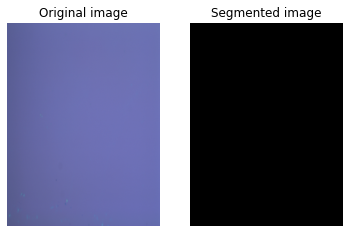

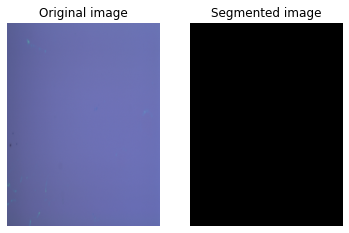

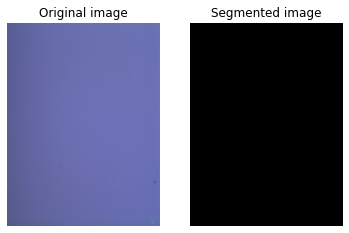

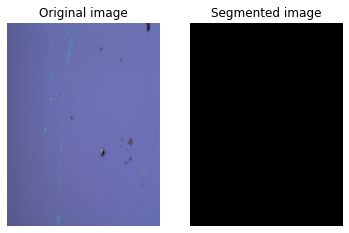

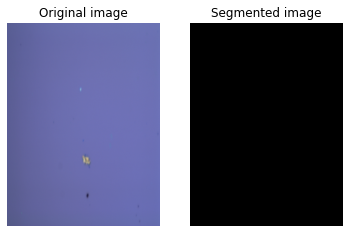

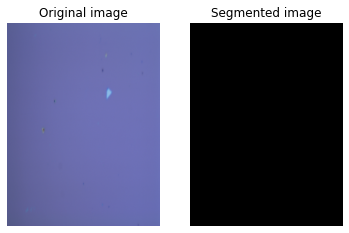

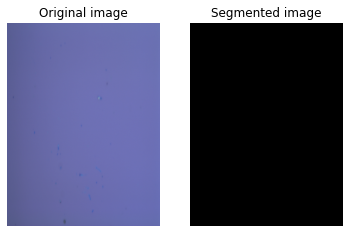

In [ ]:
t1=time.time()

# loaded_model = pickle.load(open('/content/drive/MyDrive/Woonhyung_GJ/pretrained/pretrained_XGB_model_for_colab', 'rb')) # load the saved model
# loaded_model = xgb_clf
loaded_model = pickle.load(open('/Volumes/GoogleDrive/.shortcut-targets-by-id/1-9B-dXir5KHuMODUOEkdMbl-1rTOQ0na/Woonhyung_GJ/pretrained/pretrained_XGB_model', 'rb')) # load the saved model

img_path = "/Volumes/GoogleDrive/.shortcut-targets-by-id/1-9B-dXir5KHuMODUOEkdMbl-1rTOQ0na/Woonhyung_GJ/test/*.png"
# savehere =[]

i=1
for file in glob.glob(img_path)[:]:
#     print(file)
    img1= cv2.imread(file)
    img_0= img1
    img1 = cv2.resize(img1, (int(img1.shape[0]/4),int(img1.shape[1]/4)))
    feature = feature_extractor(img1)
    img = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    result = loaded_model.predict(feature)
    segmented_img = result.reshape((img.shape))
    a=np.where(segmented_img>0)
    open_img = ndimage.binary_opening(segmented_img)
    segmented_img = ndimage.binary_closing(open_img)
    # print(np.count_nonzero(segmented_img))
    print(f"{i}번째 이미지 분석")
    fig = plt.figure()
    rows,cols = 1,2
    ax1 = fig.add_subplot(rows, cols, 1)
    ax1.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    ax1.set_title('Original image')
    ax1.axis("off")
    
    ax2 = fig.add_subplot(rows, cols, 2)
    ax2.imshow(segmented_img, cmap ='gray')
    ax2.set_title('Segmented image')
    ax2.axis("off")

#     plt.imsave(str(i)+'_segmented_XGB.png', segmented_img, cmap ='gray')
    i+=1
#     break
print("inference time : "+ str(time.time()-t1)+' sec')
# print(i)

### LightGBM

In [ ]:

import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=Y_train)

lgbm_params = {'learning_rate':0.05, 'boosting_type':'gbdt',   
              'objective':'binary',
              'metric':['f1', 'binary_logloss'],
              'num_leaves':100,
              'max_depth':10}

clf = lgb.train(lgbm_params, d_train, 50) #50 iterations. Increase iterations for small learning rates
# y_pred_lgbm=clf.predict(X_test)

[LightGBM] [Info] Number of positive: 4697, number of negative: 780773
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1659
[LightGBM] [Info] Number of data points in the train set: 785470, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005980 -> initscore=-5.113360
[LightGBM] [Info] Start training from score -5.113360


In [ ]:

filename = 'pretrained_LGB_model'
pickle.dump(clf,open(filename,'wb'))

In [ ]:
t1=time.time()

loaded_model = pickle.load(open('/content/drive/MyDrive/Woonhyung_GJ/pretrained/pretrained_LGB_model', 'rb'))
img_path = "/content/drive/MyDrive/Woonhyung_GJ/test/*.jpg"

i=0
for file in glob.glob(img_path)[:]:
    print(file)
    img1= cv2.imread(file)
    img_0= img1
    img1 = cv2.resize(img1, (int(img1.shape[0]/4),int(img1.shape[1]/4)))
    feature = feature_extractor(img1)
    img = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    result = loaded_model.predict(feature)
    result[result>0.5]=1
    result[result<=0.5]=0
    segmented_img = result.reshape((img.shape))
    a=np.where(segmented_img>0)
    open_img = ndimage.binary_opening(segmented_img)
    segmented_img = ndimage.binary_closing(open_img)
    print(np.count_nonzero(segmented_img))
    plt.imsave(f'{i}_segmented_lgb.png', segmented_img, cmap ='gray')
    i+=1
    
print("inference time : "+ str(time.time()-t1)+' sec')
print(i)

/content/drive/MyDrive/Woonhyung_GJ/test/1.jpg
908
inference time : 0.35626840591430664 sec
1


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100, random_state = 202,n_jobs = -1)
RF.fit(X_train, Y_train)



RandomForestClassifier(n_jobs=-1, random_state=202)

In [ ]:

filename = 'pretrained_RF_model'
pickle.dump(RF,open(filename,'wb'))

In [ ]:
t1=time.time()

loaded_model = pickle.load(open('/content/drive/MyDrive/Woonhyung_GJ/pretrained/pretrained_RF_model', 'rb'))
img_path = "Mono/test/*.jpg"
savehere =[]

i=0
for file in glob.glob(img_path)[:]:
    print(file)
    img1= cv2.imread(file)
    img_0= img1
    img1 = cv2.resize(img1, (int(img1.shape[0]/4),int(img1.shape[1]/4)))
    feature = feature_extractor(img1)
    img = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    result = loaded_model.predict(feature)
    segmented_img = result.reshape((img.shape))
    a=np.where(segmented_img>0)
    open_img = ndimage.binary_opening(segmented_img)
    segmented_img = ndimage.binary_closing(open_img)
    print(np.count_nonzero(segmented_img))
    plt.imsave(file.split('/')[2].split('.')[0]+'_segmented_RF.png', segmented_img, cmap ='gray')
    i+=1
    
print("inference time : "+ str(time.time()-t1)+' sec')
print(i)

inference time : 0.7648606300354004 sec
0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
filename = 'pretrained_DT_model'
pickle.dump(clf,open(filename,'wb'))

In [ ]:
t1=time.time()

loaded_model = pickle.load(open('pretrained/pretrained_DT_model', 'rb'))
img_path = "Mono/test/*.jpg"

i=0
for file in glob.glob(img_path)[:]:
    print(file)
    img1= cv2.imread(file)
    img_0= img1
    img1 = cv2.resize(img1, (int(img1.shape[0]/4),int(img1.shape[1]/4)))
    feature = feature_extractor(img1)
    img = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    result = loaded_model.predict(feature)
    result[result>0.5]=1
    result[result<=0.5]=0
    segmented_img = result.reshape((img.shape))
    a=np.where(segmented_img>0)
    open_img = ndimage.binary_opening(segmented_img)
    segmented_img = ndimage.binary_closing(open_img)
    print(np.count_nonzero(segmented_img))
    plt.imsave(file.split('/')[2].split('.')[0]+'_segmented_DT.png', segmented_img, cmap ='gray')
    i+=1
    
print("inference time : "+ str(time.time()-t1)+' sec')
print(i)

Mono/test/1.jpg
908
inference time : 0.14487195014953613 sec
1


### Apply to scanned image

In [ ]:
t1=time.time()

loaded_model = pickle.load(open('pretrained/pretrained_XGB_model', 'rb')) # load the saved model
img_path = "Sample_Scanned_images/WHGr1_June21(Mon Jun 21 10i23i32 2021)/*.png"
# savehere =[]

i=0
for file in glob.glob(img_path)[:]:
    print(file)
    img1= cv2.imread(file)
    img_0= img1
    img1 = cv2.resize(img1, (int(img1.shape[0]/4),int(img1.shape[1]/4)))
    feature = feature_extractor(img1)
    img = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    result = loaded_model.predict(feature)
    segmented_img = result.reshape((img.shape))
    a=np.where(segmented_img>0)
    open_img = ndimage.binary_opening(segmented_img)
    segmented_img = ndimage.binary_closing(open_img)
    print(np.count_nonzero(segmented_img))

    plt.imsave('Sample_Scanned_images/WHGr1_June21(Mon Jun 21 10i23i32 2021)/Segmetned/'+str(i)+'.png', segmented_img, cmap ='gray')
    i+=1
    
print("inference time : "+ str(time.time()-t1)+' sec')
print(i)